Top 5 models based on best mean cross-validation score:

1. XGBoost Classifier : 0.85

XGB Train Performance:  0.9263420724094882

XGB Test Performance:  0.8111111111111111

2. Gradient Boosting : 0.84

3. Extra Trees Classifier : 0.83

4. Random Forest Classifier : 0.83

5. Linear SVC Classifier : 0.83

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
cd drive/

/content/drive


In [4]:
cd 'My Drive'

/content/drive/My Drive


In [5]:
cd 'Colab Notebooks'

/content/drive/My Drive/Colab Notebooks


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [7]:
data = pd.read_csv('titanic.csv')

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [0]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
# let's inspect the variable values

for var in data.columns:
    print(var, data[var].unique()[0:20], '\n')

PassengerId [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] 

Survived [0 1] 

Pclass [3 1 2] 

Name ['Braund, Mr. Owen Harris'
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
 'Heikkinen, Miss. Laina' 'Futrelle, Mrs. Jacques Heath (Lily May Peel)'
 'Allen, Mr. William Henry' 'Moran, Mr. James' 'McCarthy, Mr. Timothy J'
 'Palsson, Master. Gosta Leonard'
 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)'
 'Nasser, Mrs. Nicholas (Adele Achem)' 'Sandstrom, Miss. Marguerite Rut'
 'Bonnell, Miss. Elizabeth' 'Saundercock, Mr. William Henry'
 'Andersson, Mr. Anders Johan' 'Vestrom, Miss. Hulda Amanda Adolfina'
 'Hewlett, Mrs. (Mary D Kingcome) ' 'Rice, Master. Eugene'
 'Williams, Mr. Charles Eugene'
 'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)'
 'Masselmani, Mrs. Fatima'] 

Sex ['male' 'female'] 

Age [22. 38. 26. 35. nan 54.  2. 27. 14.  4. 58. 20. 39. 55. 31. 34. 15. 28.
  8. 19.] 

SibSp [1 0 3 4 2 5 8] 

Parch [0 1 2 5 3 4 6] 

Ticket ['A/5 21171' 'PC 1

In [10]:
# make list of variables  types

# numerical: discrete vs continuous
discrete = [var for var in data.columns if data[var].dtype!='O' and var!='Survived' and data[var].nunique()<10]
continuous = [var for var in data.columns if data[var].dtype!='O' and var!='Survived' and var not in discrete]

# mixed
mixed = ['Cabin']

# categorical
categorical = [var for var in data.columns if data[var].dtype=='O' and var not in mixed]

print(f'There are {len(discrete)} discrete variables')
print(f'There are {len(continuous)} continuous variables')
print(f'There are {len(categorical)} categorical variables')
print(f'There are {len(mixed)} mixed variables')

There are 3 discrete variables
There are 3 continuous variables
There are 4 categorical variables
There are 1 mixed variables


In [11]:
print(discrete)
print(type(discrete))
print(len(discrete))

['Pclass', 'SibSp', 'Parch']
<class 'list'>
3


In [0]:
# missing values
data.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [0]:
# cardinality (number of different categories)

data[categorical+mixed].nunique()

Name        891
Sex           2
Ticket      681
Embarked      3
Cabin       147
dtype: int64

In [12]:
# Cabin- mixed variable
# \d regular expression for digts . \d+ one or more digits
data['Cabin_num'] = data['Cabin'].str.extract('(\d+)') # captures numerical part
data['Cabin_num'] = data['Cabin_num'].astype('float')
data['Cabin_cat'] = data['Cabin'].str[0] # captures the first letter

# show dataframe
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_num,Cabin_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,85.0,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,123.0,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN,NaN


In [13]:
data['Title'] = data['Name'].str.split(',').str[1].str.split('\s+').str[1]
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_num,Cabin_cat,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,NaN,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,85.0,C,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,NaN,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,123.0,C,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN,NaN,Mr.


In [14]:
data['Title'].value_counts()

Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Major.         2
Mlle.          2
Col.           2
Ms.            1
Jonkheer.      1
Lady.          1
Capt.          1
Sir.           1
the            1
Don.           1
Mme.           1
Name: Title, dtype: int64

In [0]:
data['Cabin_cat'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin_cat, dtype: int64

In [0]:
# drop original mixed
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_num,Cabin_cat,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,NaN,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,85.0,C,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,NaN,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,123.0,C,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN,NaN,Mr.


In [0]:
data.drop(['PassengerId','Name','Ticket','Cabin'], axis=1,inplace=True)

In [16]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_num,Cabin_cat,Title
0,0,3,male,22.0,1,0,7.2500,S,NaN,NaN,Mr.
1,1,1,female,38.0,1,0,71.2833,C,85.0,C,Mrs.
2,1,3,female,26.0,0,0,7.9250,S,NaN,NaN,Miss.
3,1,1,female,35.0,1,0,53.1000,S,123.0,C,Mrs.
4,0,3,male,35.0,0,0,8.0500,S,NaN,NaN,Mr.


In [0]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin_num
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,200.00000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,50.49000
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,35.39497
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,2.00000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,22.00000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,43.00000
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,77.25000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,148.00000


In [17]:
# separate into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('Survived', axis=1),  # predictors
    data['Survived'],  # target
    test_size=0.1,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape, X_test.shape

type(X_train), type(X_test)

(pandas.core.frame.DataFrame, pandas.core.frame.DataFrame)

In [0]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_num,Cabin_cat,Title
815,1,male,NaN,0,0,0.0000,S,102.0,B,Mr.
877,3,male,19.0,0,0,7.8958,S,NaN,NaN,Mr.
193,2,male,3.0,1,1,26.0000,S,2.0,F,Master.
523,1,female,44.0,0,1,57.9792,C,18.0,B,Mrs.
634,3,female,9.0,3,2,27.9000,S,NaN,NaN,Miss.


In [0]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 801 entries, 815 to 684
Data columns (total 10 columns):
Pclass       801 non-null int64
Sex          801 non-null object
Age          643 non-null float64
SibSp        801 non-null int64
Parch        801 non-null int64
Fare         801 non-null float64
Embarked     799 non-null object
Cabin_num    175 non-null float64
Cabin_cat    179 non-null object
Title        801 non-null object
dtypes: float64(3), int64(3), object(4)
memory usage: 68.8+ KB


In [18]:
!pip install feature-engine


  Created wheel for numpydoc: filename=numpydoc-0.9.2-cp36-none-any.whl size=31893 sha256=94ae510fa047db653ff621cb947176294adc8712e2bfb15d8922bf937fe2f621
  Stored in directory: /root/.cache/pip/wheels/96/f3/52/25c8e1f40637661d27feebc61dae16b84c7cdd93b8bc3d7486
Successfully built numpydoc


In [0]:
# from feature-engine
from feature_engine import missing_data_imputers as mdi
# for one hot encoding with feature-engine
from feature_engine.categorical_encoders import OneHotCategoricalEncoder
from feature_engine.categorical_encoders import RareLabelCategoricalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [0]:
titanic_pipe = Pipeline([

    # missing data imputation 
    ('imputer_num_arbit',
     mdi.ArbitraryNumberImputer(arbitrary_number=-1,
                                variables=['Cabin_num'])),
    ('imputer_num_mean',
     mdi.MeanMedianImputer(imputation_method='mean',variables=['Age'])),
    
    ('imputer_cat_freq',
     mdi.FrequentCategoryImputer(variables=['Embarked'])),
    
    ('imputer_cat_missing',
     mdi.CategoricalVariableImputer(variables=['Cabin_cat','Title'])),

    # categorical encoding 
    ('encoder_rare_label',
     RareLabelCategoricalEncoder(tol=0.01,
                                    n_categories=4,
                                    variables=['Cabin_cat','Title'])),
    ('categorical_encoder',
     OneHotCategoricalEncoder( top_categories=None,
                               variables=['Sex', 'Embarked','Cabin_cat','Title'], # we can select which variables to encode
                               drop_last=True)),

])

In [21]:
titanic_pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('imputer_num_arbit',
                 ArbitraryNumberImputer(arbitrary_number=-1,
                                        variables=['Cabin_num'])),
                ('imputer_num_mean',
                 MeanMedianImputer(imputation_method='mean',
                                   variables=['Age'])),
                ('imputer_cat_freq',
                 FrequentCategoryImputer(variables=['Embarked'])),
                ('imputer_cat_missing',
                 CategoricalVariableImputer(variables=['Cabin_cat', 'Title'])),
                ('encoder_rare_label',
                 RareLabelCategoricalEncoder(n_categories=4, tol=0.01,
                                             variables=['Cabin_cat', 'Title'])),
                ('categorical_encoder',
                 OneHotCategoricalEncoder(drop_last=True, top_categories=None,
                                          variables=['Sex', 'Embarked',
                                                    

In [0]:
# Apply Transformations
X_train=titanic_pipe.transform(X_train)
X_test=titanic_pipe.transform(X_test)

Logistic Regression Model

In [42]:
# Train a logistic regression model, report the coefficients and model performance 

# YOUR CODE HERE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

clf = LogisticRegression().fit(X_train, y_train)

cv_scores = cross_val_score(clf, X_train, y_train)

# Mean Cross validation Score
print("Mean Cross-validation scores: {}".format(cv_scores.mean()))
print()

# Print Co-efficients
print("Logistic.coef_:", clf.coef_)
print("Logistic.intercept_:", clf.intercept_)

# Check test data set performance
print("Logistic Performance: ", clf.score(X_test,y_test))



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Mean Cross-validation scores: 0.8215062111801241

Logistic.coef_: [[-0.50235979 -0.0242225  -0.58564075 -0.38295973  0.0081771   0.00498142
  -0.62741458  0.29387082  0.85363946 -0.0428281  -0.02378291  0.32127423
   0.68731545 -0.1581261   1.12231587 -0.60271824 -1.6254209   1.46360283
   1.31710371  0.73536876]]
Logistic.intercept_: [1.90086011]
Logistic Performance:  0.8555555555555555


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


KNN Classifier

In [43]:
# Train a KNN model, report the coefficients, the best parameters, and model performance 
# hint: find the optimal k

# YOUR CODE HERE

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import r2_score

knn = KNeighborsClassifier()

# define a list of parameters

param_knn = {'n_neighbors': range(5,25)}

#apply grid search
grid_knn = GridSearchCV(knn, param_knn, cv=5, return_train_score=True)
grid_knn.fit(X_train, y_train)

y_pred= grid_knn.predict(X_test)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(grid_knn.best_score_))
print()

#find best parameters
print('KNN parameters: ', grid_knn.best_params_)

# Check test data set performance
print("KNN Test Performance: ", grid_knn.score(X_test,y_test))
print("KNN r2_score: ", r2_score(y_test, y_pred))

Best Mean Cross-validation score: 0.72

KNN parameters:  {'n_neighbors': 7}
KNN Test Performance:  0.8111111111111111
KNN r2_score:  0.23076923076923084


Decision Tree Classifier

In [44]:
# Train a Decision Tree model, report the coefficients, the best parameters, and model performance (10 points)
# hint: find the optimal max_depth

# YOUR CODE HERE
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

dtree = DecisionTreeClassifier(random_state=0)

#define a list of parameters
param_dtree = {'max_depth': range(1,20)}

#apply grid search
grid_dtree = GridSearchCV(dtree, param_dtree, cv=5, return_train_score = True)
grid_dtree.fit(X_train, y_train)

y_pred_tree= grid_dtree.predict(X_test)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(grid_dtree.best_score_))
print()

#find best parameters
print('Decision Tree parameters: ', grid_dtree.best_params_)

# Check test data set performance
print("Decision Tree Performance: ", grid_dtree.score(X_test,y_test))
print("r2_score: ", r2_score(y_test, y_pred_tree))

Best Mean Cross-validation score: 0.83

Decision Tree parameters:  {'max_depth': 4}
Decision Tree Performance:  0.8222222222222222
r2_score:  0.27601809954751133


## Support Vector Classifier

In [45]:
#Linear SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import r2_score

linearSVC_parameters= { 
                'tol':[0.0001,0.001,0.01,1],
                'C':[0.1,1,10,100,1000]
}

linearSVC_gridSearch= GridSearchCV(LinearSVC(max_iter=10000),linearSVC_parameters, cv=3, return_train_score=True)

linearSVC_gridSearch.fit(X_train, y_train)

y_predSVC= linearSVC_gridSearch.predict(X_test)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(linearSVC_gridSearch.best_score_))
print()

#find best parameters
print('Support Vector Classifier parameters: ', linearSVC_gridSearch.best_params_)

# Check test data set performance
print("Support Vector Classifier Test Performance: ", linearSVC_gridSearch.score(X_test,y_test))
print("r2_score: ", r2_score(y_test, y_predSVC))



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

Best Mean Cross-validation score: 0.83

Support Vector Classifier parameters:  {'C': 0.1, 'tol': 0.01}
Support Vector Classifier Test Performance:  0.8444444444444444
r2_score:  0.36651583710407243


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


SVC with kernels

In [0]:
#RBF Kernel

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import r2_score

SVCR_parameters= { 'C':[0.1,1,10,100],
                'gamma': ['scale','auto'],
                 'tol':[0.0001,0.001,0.01,0.1]
}

SVCR_gridSearch= GridSearchCV(SVC(kernel='rbf'),SVCR_parameters, cv=5, return_train_score=True)

SVCR_gridSearch.fit(X_train, y_train)

y_predRBF= SVCR_gridSearch.predict(X_test)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(SVCR_gridSearch.best_score_))
print()

#find best parameters
print('SVC with RBF kernel parameters: ', SVCR_gridSearch.best_params_)

# Check test data set performance
print("SVC with RBF Kernel Test Performance: ", SVCR_gridSearch.score(X_test,y_test))
print("r2_score: ", r2_score(y_test, y_predRBF))


Best Mean Cross-validation score: 0.79

SVC with RBF kernel parameters:  {'C': 100, 'gamma': 'scale', 'tol': 0.1}
SVC with RBF Kernel Test Performance:  0.8333333333333334
r2_score:  0.32126696832579194


In [0]:
#Polynomial Kernel

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import r2_score

SVCP_parameters= { 'C':[0.1,1,10],
                'tol':[0.0001,0.001,0.01,0.1],
                'degree':[1,2],
                'coef0':[0.01,0.0,0.1]
}

SVCP_gridSearch= GridSearchCV(SVC(kernel='poly'),SVCP_parameters, cv=5, return_train_score=True)

SVCP_gridSearch.fit(X_train, y_train)

y_predPoly= SVCP_gridSearch.predict(X_test)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(SVCP_gridSearch.best_score_))
print()

#find best parameters
print('SVC with Polynomial kernel parameters: ', SVCP_gridSearch.best_params_)

# Check test data set performance
print("SVC with Polynomial Kernel Test Performance: ", SVCP_gridSearch.score(X_test,y_test))
print("r2_score: ", r2_score(y_test, y_predPoly))


Best Mean Cross-validation score: 0.71

SVC with Polynomial kernel parameters:  {'C': 10, 'coef0': 0.01, 'degree': 2, 'tol': 0.1}
SVC with Polynomial Kernel Test Performance:  0.7
r2_score:  -0.22171945701357454


In [0]:
# Sigmoid kernel

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import r2_score

SVCsigmoid_parameters= { 'C':[0.1,1,10,100,1000,10000,100000],
                'gamma': [1e-7, 1e-6, 1e-5, 1e-4]
}

SVCsigmoid_gridSearch= GridSearchCV(SVC(kernel='sigmoid'),SVCsigmoid_parameters, cv=3, return_train_score=True)

SVCsigmoid_gridSearch.fit(X_train, y_train)

y_predSigmoid= SVCsigmoid_gridSearch.predict(X_test)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(SVCsigmoid_gridSearch.best_score_))
print()

#find best parameters
print('SVC Sigmoid Kernel Test Performance parameters: ', SVCsigmoid_gridSearch.best_params_)

# Check test data set performance
print("SVC Sigmoid Kernel Test Performance: ", SVCsigmoid_gridSearch.score(X_test,y_test))
print("r2_score: ", r2_score(y_test, y_predSigmoid))



Best Mean Cross-validation score: 0.82

SVC Sigmoid Kernel Test Performance parameters:  {'C': 100000, 'gamma': 1e-06}
SVC Sigmoid Kernel Test Performance:  0.8111111111111111
r2_score:  0.23076923076923084


Linear SVC(best model from HW2) with Bagging

In [40]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import r2_score

bag_param = {
                 'max_samples':  [50,100],
                 'n_estimators': [10,25,100]}

bagging = BaggingClassifier(linearSVC_gridSearch, bootstrap=True, random_state=0, oob_score=False)
bag_clf = GridSearchCV(bagging ,bag_param,cv=5, return_train_score=True, )

bag_clf.fit(X_train, y_train)
y_pred_bag_clf = bag_clf.predict(X_test)

# Check test data set performance
print("r2 Score ", r2_score(y_test, y_pred_bag_clf ))
print("Linear SVC(Bagging) Train Performance: ", bag_clf.score(X_train, y_train) )
print("Linear SVC(Bagging) Test Performance: ", bag_clf.score(X_test,y_test))

Streaming output truncated to the last 5000 lines.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear

r2 Score  0.36651583710407243
Linear SVC(Bagging) Train Performance:  0.8277153558052435
Linear SVC(Bagging) Test Performance:  0.8444444444444444


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Decision Tree Classifier (from HW2) with Bagging

In [73]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV

bag_param = {
                 'max_samples':  [50,100],
                 'n_estimators': [10,25,100]}

bagging = BaggingClassifier(dtree,bootstrap=True, random_state=0, oob_score=False)

dt_bag = GridSearchCV(bagging, bag_param, cv=5, return_train_score=True)

dt_bag.fit(X_train, y_train)
y_pred_dt_bag = dt_bag.predict(X_test)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(dt_bag.best_score_))
print()

#find best parameters
print('Test Performance parameters: ', dt_bag.best_params_)

# Check test data set performance
print("r2 Score ", r2_score(y_test, y_pred_dt_bag ))
print("Decision Tree(Bagging) Train Performance: ", dt_bag.score(X_train, y_train) )
print("Decision Tree(Bagging) Test Performance: ", dt_bag.score(X_test,y_test))

Best Mean Cross-validation score: 0.84

Test Performance parameters:  {'max_samples': 100, 'n_estimators': 100}
r2 Score  0.23076923076923084
Decision Tree(Bagging) Train Performance:  0.8701622971285893
Decision Tree(Bagging) Test Performance:  0.8111111111111111


Linear SVC(best model from HW2) with pasting

In [75]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV

paste_param = {
                 'max_samples':  [50,100],
                 'n_estimators': [10,25,100]}

psvc = BaggingClassifier(linearSVC_gridSearch, bootstrap=False, random_state=0, oob_score=False)
pasting_SVC = GridSearchCV(psvc, paste_param, cv=5, return_train_score=True)

pasting_SVC.fit(X_train, y_train)
y_pred_psvc = pasting_SVC.predict(X_test)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(pasting_SVC.best_score_))
print()

#find best parameters
print('Test Performance parameters: ', pasting_SVC.best_params_)

# Check test data set performance
print("r2 Score ", r2_score(y_test, y_pred_psvc ))
print("Lasso(Pasting) Train Performance: ", pasting_SVC.score(X_train, y_train) )
print("Lasso(Pasting) Test Performance: ", pasting_SVC.score(X_test,y_test))

Streaming output truncated to the last 5000 lines.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear

Best Mean Cross-validation score: 0.82

Test Performance parameters:  {'max_samples': 100, 'n_estimators': 25}
r2 Score  0.27601809954751133
Lasso(Pasting) Train Performance:  0.8164794007490637
Lasso(Pasting) Test Performance:  0.8222222222222222


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Decision Tree Classifier(from HW2) with pasting

In [76]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

paste_dtree1_param = {
                 'max_samples':  [50,100],
                 'n_estimators': [50,100]}

pastingDT = BaggingClassifier(dtree, n_estimators=100, max_samples=100, bootstrap=False, random_state=0, oob_score=False)
dt_pasting= GridSearchCV(pastingDT, paste_dtree1_param, cv=5, return_train_score=True)

dt_pasting.fit(X_train, y_train)
y_pred_dt = dt_pasting.predict(X_test)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(dt_pasting.best_score_))
print()

#find best parameters
print('Test Performance parameters: ', dt_pasting.best_params_)

# Check test data set performance
print("r2 Score ", r2_score(y_test, y_pred_dt ))
print("Decision Tree(Bagging) Train Performance: ", dt_pasting.score(X_train, y_train) )
print("Decision Tree(Bagging) Test Performance: ", dt_pasting.score(X_test,y_test))

Best Mean Cross-validation score: 0.84

Test Performance parameters:  {'max_samples': 100, 'n_estimators': 100}
r2 Score  0.23076923076923084
Decision Tree(Bagging) Train Performance:  0.8701622971285893
Decision Tree(Bagging) Test Performance:  0.8111111111111111


Gradient Boosting

In [51]:
from  sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV 

GB_parameters= { 'max_depth':[2,4],
                'learning_rate':[0.1,1.0]}

GB_gridSearch= GridSearchCV(GradientBoostingClassifier(random_state=42),GB_parameters, cv=5, return_train_score=True)

GB_gridSearch.fit(X_train, y_train)
# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(GB_gridSearch.best_score_))
print()

y_pred_GB= GB_gridSearch.predict(X_test)

#find best parameters
print('Gradient Boosting Test Performance parameters: ', GB_gridSearch.best_params_)

# Check test data set performance
print("r2 Score ", r2_score(y_test, y_pred_GB ))
print("Gradient Boosting Train Performance: ", GB_gridSearch.score(X_train, y_train) )
print("Gradient Boosting Test Performance: ", GB_gridSearch.score(X_test,y_test))


Best Mean Cross-validation score: 0.84

Gradient Boosting Test Performance parameters:  {'learning_rate': 0.1, 'max_depth': 4}
r2 Score  0.14027149321266974
Gradient Boosting Train Performance:  0.9400749063670412
Gradient Boosting Test Performance:  0.7888888888888889


Random Forest Classifier

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV 

rnd_parameters= {'max_leaf_nodes':[4,8,16]}

rnd = RandomForestClassifier(random_state=0)
rndGridSearch= GridSearchCV(rnd, rnd_parameters, cv=3, return_train_score=True)

rndGridSearch.fit(X_train, y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(rndGridSearch.best_score_))
print()
y_pred_rf= rndGridSearch.predict(X_test)

#find best parameters
print('Random Forest Test Performance parameters: ', rndGridSearch.best_params_)

# Check test data set performance
print("r2 Score ", r2_score(y_test, y_pred_rf ))
print("Random Forest Train Performance: ", rndGridSearch.score(X_train, y_train) )
print("Random Forest Test Performance: ", rndGridSearch.score(X_test,y_test))


Best Mean Cross-validation score: 0.83

Random Forest Test Performance parameters:  {'max_leaf_nodes': 16}
r2 Score  0.41176470588235303
Random Forest Train Performance:  0.8664169787765293
Random Forest Test Performance:  0.8555555555555555


AdaBoost Classifier

In [53]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV 

adaB_parameters= {'n_estimators':[50,100,500],
                  'learning_rate':[0.1,1.0,10]}

adaBGridSearch= GridSearchCV( AdaBoostClassifier(base_estimator= dtree, random_state=0), adaB_parameters, cv=3, return_train_score=True)

adaBGridSearch.fit(X_train, y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(adaBGridSearch.best_score_))
print()

#predicting class
y_pred_ab= adaBGridSearch.predict(X_test)

#find best parameters
print('AdaBoosting Test Performance parameters: ', adaBGridSearch.best_params_)

# Check test data set performance
print("r2 Score ", r2_score(y_test, y_pred_ab ))
print("AdaBoosting Train Performance: ", adaBGridSearch.score(X_train, y_train) )
print("AdaBoosting Test Performance: ", adaBGridSearch.score(X_test,y_test))

Best Mean Cross-validation score: 0.80

AdaBoosting Test Performance parameters:  {'learning_rate': 0.1, 'n_estimators': 500}
r2 Score  0.09502262443438925
AdaBoosting Train Performance:  0.9862671660424469
AdaBoosting Test Performance:  0.7777777777777778


Extra Trees Classifier

In [54]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import r2_score

EXT_parameters= {'n_estimators':[50,100,500],
                  'max_depth':[6,7,8,9]}

EXTGridSearch= GridSearchCV( ExtraTreesClassifier(random_state=0), EXT_parameters, cv=3, return_train_score=True)

EXTGridSearch.fit(X_train, y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(EXTGridSearch.best_score_))
print()

#predicting houseprice
y_pred_ext= EXTGridSearch.predict(X_test)

#find best parameters
print('Extra Trees Test Performance parameters: ', EXTGridSearch.best_params_)

# Check test data set performance
print("r2 Score ", r2_score(y_test, y_pred_ext ))
print("Extra Trees Train Performance: ", EXTGridSearch.score(X_train, y_train) )
print("Extra Trees Test Performance: ", EXTGridSearch.score(X_test,y_test))

Best Mean Cross-validation score: 0.83

Extra Trees Test Performance parameters:  {'max_depth': 9, 'n_estimators': 50}
r2 Score  0.32126696832579194
Extra Trees Train Performance:  0.9026217228464419
Extra Trees Test Performance:  0.8333333333333334


XGBoost Classifier

In [55]:
!pip install xgboost

In [56]:
import xgboost as xgb
from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV 
'''X_train, X_test, y_train, y_test = train_test_split(data.drop(['Id', 'SalePrice'], axis=1),
                                                    data['SalePrice'],
                                                    test_size=0.1,
                                                    random_state=0)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

trainMatrix= xgb.DMatrix(data= X_train, label=y_train)
type(trainMatrix)'''

xgb_parameters= {'learning_rate':[0.1,1,10],
                 'max_depth':[3,4,5],
                 'gamma':[0,0.1,1.0],
                 'alpha':[0,0.1,1.0],
                 'lambda':[0,1,10,100]}

xgbGridSearch= GridSearchCV( XGBClassifier(n_estimators=100,random_state=0, n_jobs=1), xgb_parameters, cv=3, return_train_score=True)

xgbGridSearch.fit(X_train,y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(xgbGridSearch.best_score_))
print()

#predicting houseprice
y_pred_xgb= xgbGridSearch.predict(X_test)

#find best parameters
print('XGB Test Performance parameters: ', xgbGridSearch.best_params_)

# Check test data set performance
print("r2 Score ", r2_score(y_test, y_pred_xgb ))
print("XGB Train Performance: ", xgbGridSearch.score(X_train, y_train) )
print("XGB Test Performance: ", xgbGridSearch.score(X_test,y_test))

Best Mean Cross-validation score: 0.85

XGB Test Performance parameters:  {'alpha': 0, 'gamma': 0, 'lambda': 0, 'learning_rate': 0.1, 'max_depth': 5}
r2 Score  0.23076923076923084
XGB Train Performance:  0.9263420724094882
XGB Test Performance:  0.8111111111111111


Voting Classifier for top 5 models based on best mean cross-validation score

In [38]:
from sklearn.ensemble import VotingClassifier

xgb_clf= XGBClassifier(alpha=0, gamma=0,learning_rate=0.1, max_depth=5)
ext_clf= ExtraTreesClassifier(max_depth=9, n_estimators=50)
gb_clf= GradientBoostingClassifier(learning_rate=0.1, max_depth=4)
rnd_clf= RandomForestClassifier(max_leaf_nodes=16)
svc_clf= LinearSVC(C=0.1, tol=0.01)


voting_clf = VotingClassifier(estimators=[('XG Boost', xgb_clf), 
                                          ('Extra Trees', ext_clf), 
                                          ('Gradient Boosting', gb_clf),
                                          ('Random Forest',rnd_clf),
                                          ('Linear SVC',svc_clf )], 
                                           voting='hard')
voting_clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
for clf in (xgb_clf, ext_clf, gb_clf, rnd_clf, svc_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__)
    print(accuracy_score(y_test, y_pred))
    print()

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


XGBClassifier
0.8111111111111111

ExtraTreesClassifier
0.8333333333333334

GradientBoostingClassifier
0.7888888888888889

RandomForestClassifier
0.8555555555555555



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC
0.8444444444444444

VotingClassifier
0.8333333333333334



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Stacking Classifier using top 5 models based on best mean cross validation score

In [39]:
from sklearn.ensemble import StackingClassifier

xgb_clf= XGBClassifier(alpha=0, gamma=0,learning_rate=0.1, max_depth=5)
ext_clf= ExtraTreesClassifier(max_depth=9, n_estimators=50)
gb_clf= GradientBoostingClassifier(learning_rate=0.1, max_depth=4)
rnd_clf= RandomForestClassifier(max_leaf_nodes=16)
svc_clf= LinearSVC(C=0.1, tol=0.01)


stacking_clf = StackingClassifier(estimators=[('XG Boost', xgb_clf), 
                                          ('Extra Trees', ext_clf), 
                                          ('Gradient Boosting', gb_clf),
                                          ('Random Forest',rnd_clf),
                                          ('Linear SVC',svc_clf )])
stacking_clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
for clf in (xgb_clf, ext_clf, gb_clf, rnd_clf, svc_clf, stacking_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__)
    print(accuracy_score(y_test, y_pred))
    print()

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

XGBClassifier
0.8111111111111111

ExtraTreesClassifier
0.8333333333333334

GradientBoostingClassifier
0.7888888888888889

RandomForestClassifier
0.8666666666666667



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC
0.8111111111111111



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


StackingClassifier
0.8222222222222222



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

Summary

In [0]:
classifiers={'knn':grid_knn ,
             #'logreg': clf,
             'lsvc':linearSVC_gridSearch,
             #'ksvcr':SVCR_gridSearch,
             'dtree':grid_dtree,
             'bag_svc':bag_clf,
             'bag_dtree':dt_bag,
             'paste_svc':pasting_SVC,
             'paste_dt': dt_pasting,
             'GB':GB_gridSearch,
             'RF': rndGridSearch,
             'adaB': adaBGridSearch,
             'EXT': EXTGridSearch,
             'XGB':xgbGridSearch,
}

In [0]:
results_mean_std = []
for  key, value in classifiers.items():
    mean = value.cv_results_['mean_test_score'][value.best_index_]
    std=value.cv_results_['std_test_score'][value.best_index_]
     
    results_mean_std.append({
        "model": key,
        "mean": mean,
        "std": std
    })

In [0]:
# Create a Pandas DataFrame with the mean+std results
accuracy_df = pd.DataFrame(results_mean_std, columns=['model', 'mean', 'std'])

In [0]:
# Create a prediction of all models on the test set
predictions_all = {}
for  key, value in classifiers.items():
    # Get best estimator
    best_model = value.best_estimator_
    
    # Predict test labels
    predictions = best_model.predict(X_test)
    
    # Save predictions to a list
    predictions_all[key] = predictions

In [0]:
# Creat a DataFrame for the predictions
pred = pd.DataFrame(predictions_all)

Text(0.5, 1.0, 'Correlation of the test set label prediction between models')

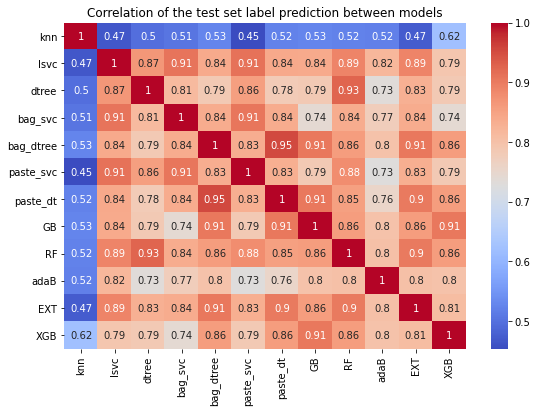

In [82]:
# Plot a heatmap of all correlations for easier visualization
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9,6))
g = sns.heatmap(pred.corr(), annot=True, cmap='coolwarm', ax=ax)
g.set_title('Correlation of the test set label prediction between models')

Voting Classifier with top 5 models having least correlation

In [86]:
from sklearn.ensemble import VotingClassifier

dtree_clf= DecisionTreeClassifier(max_depth=4)
ext_clf= ExtraTreesClassifier(max_depth=9, n_estimators=50)
bag_clf= BaggingClassifier(linearSVC_gridSearch, bootstrap=True, random_state=0, oob_score=False)
paste_clf= BaggingClassifier(linearSVC_gridSearch, max_samples= 100, n_estimators=25, bootstrap=False, random_state=0, oob_score=False)
svc_clf= LinearSVC(C=0.1, tol=0.01)


voting_clf = VotingClassifier(estimators=[('DTree', dtree_clf), 
                                          ('Extra Trees', ext_clf), 
                                          ('Bagging',bag_clf),
                                          ('Pasting',paste_clf),
                                          ('Linear SVC',svc_clf )], 
                                           voting='hard')
voting_clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
for clf in (dtree_clf, ext_clf, bag_clf, paste_clf, svc_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__)
    print(accuracy_score(y_test, y_pred))
    print()

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

DecisionTreeClassifier
0.8222222222222222

ExtraTreesClassifier
0.8333333333333334



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

BaggingClassifier
0.8666666666666667



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

BaggingClassifier
0.8222222222222222

LinearSVC
0.8444444444444444



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

VotingClassifier
0.8444444444444444



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Stacking Classifier based on models having the least correlation

In [0]:
from sklearn.ensemble import StackingClassifier

dtree_clf= DecisionTreeClassifier(max_depth=4)
ext_clf= ExtraTreesClassifier(max_depth=9, n_estimators=50)
bag_clf= BaggingClassifier(linearSVC_gridSearch, bootstrap=True, random_state=0, oob_score=False)
paste_clf= BaggingClassifier(linearSVC_gridSearch, max_samples= 100, n_estimators=25, bootstrap=False, random_state=0, oob_score=False)
svc_clf= LinearSVC(C=0.1, tol=0.01)


stacking_clf2 = StackingClassifier(estimators=[('DTree', dtree_clf), 
                                          ('Extra Trees', ext_clf), 
                                          ('Bagging',bag_clf),
                                          ('Pasting',paste_clf),
                                          ('Linear SVC',svc_clf )])
stacking_clf2 .fit(X_train, y_train)

from sklearn.metrics import accuracy_score
for clf in (dtree_clf, ext_clf, bag_clf, paste_clf, svc_clf, stacking_clf2 ):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__)
    print(accuracy_score(y_test, y_pred))
    print()

Streaming output truncated to the last 5000 lines.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear

DecisionTreeClassifier
0.8222222222222222

ExtraTreesClassifier
0.8444444444444444



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

BaggingClassifier
0.8666666666666667



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

BaggingClassifier
0.8222222222222222

LinearSVC
0.8333333333333334



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn